In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(return_X_y=True)

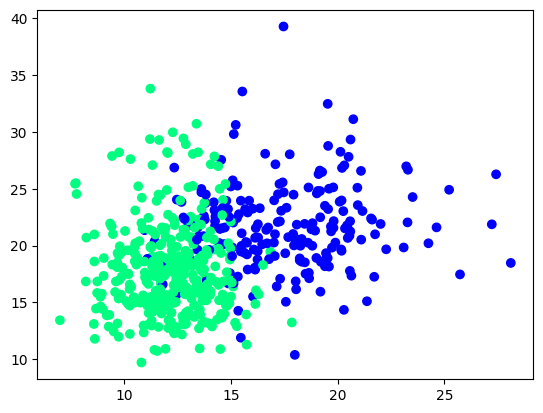

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

In [35]:
class Logistic_Regression():
    
    def __init__(self, learning_rate, epochs):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            y_hat = sigmoid(np.dot(X_train, self.coef_))

            coef_slope = np.dot((y_train - y_hat), X_train)

            self.coef_ = self.coef_ - (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = sigmoid(np.dot(X_test, self.coef_))

        return y_pred


In [36]:
lg_custom = Logistic_Regression(learning_rate=0.0001, epochs=1000)

In [37]:
lg_custom.fit(X_train, y_train)

Coef_: [1.7900000e+01 2.9534600e+02 3.6422000e+02 1.9447190e+03 1.6478730e+04
 2.7327760e+00 3.4316590e+00 3.6947940e+00 2.4663040e+00 4.2707100e+00
 2.0583240e+00 1.1152810e+01 2.1287030e+01 7.3375900e+01 1.2145800e+03
 1.1142135e+00 1.5371798e+00 1.7072370e+00 1.2535658e+00 1.3485399e+00
 1.0671197e+00 3.5636400e+02 4.9481900e+02 2.3790660e+03 2.3833850e+04
 3.4410490e+00 7.2760410e+00 8.6294880e+00 4.0614260e+00 6.5201500e+00
 2.5400460e+00]


In [38]:
y_pred_custom = lg_custom.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

acc_c = accuracy_score(y_test, y_pred_custom)

acc_c

0.6228070175438597